In [3]:
include("src.jl")
using FFTW, Plots

## Spin echo - J0 = ε = 0

Finished 10th iteration
Finished 20th iteration
Finished 30th iteration
Finished 40th iteration
Finished 50th iteration
Finished 60th iteration
Finished 70th iteration
Finished 80th iteration
Finished 90th iteration
Finished 100th iteration


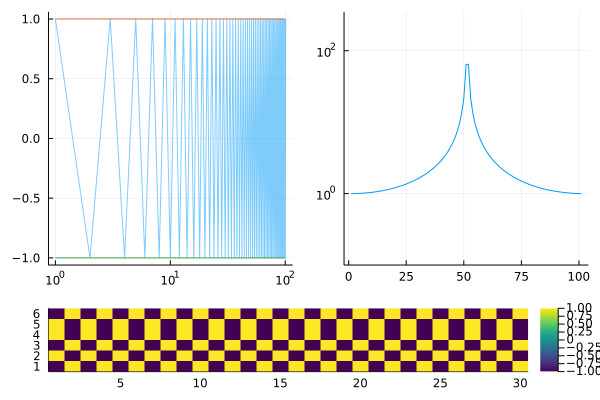

In [7]:
n = 100
realres, spinmap = effAvgAutoCor(100, n, [0,1,0,1,1,0], 0.0, 0.0, 0.0, 0.0, 1.0)
res = abs.(fft(realres))
l = @layout [a b ; c{0.2h}] 
plot(realres, opacity=0.5,xscale=:log10, legend=false)
plot!(collect(1:2:n),realres[1:2:n])
p1 = plot!([1; collect(2:2:n)],[-1.0 ; realres[2:2:n]])
p21 = plot(res, yscale =:log10, ylims=(0.1,350), legend=false)
p3 = heatmap(spinmap[:,1:30], c=:viridis, clims=(-1,1))
plot(p1,p21, p3, layout=l)

## MBL with onsite and Ising-even disorder

Finished 10th iteration
Finished 20th iteration
Finished 30th iteration
Finished 40th iteration
Finished 50th iteration
Finished 60th iteration
Finished 70th iteration
Finished 80th iteration
Finished 90th iteration
Finished 100th iteration


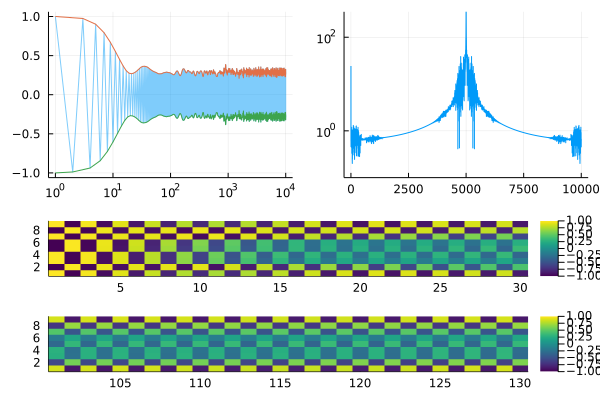

In [10]:
n = 10000
init=[1,0,1,1,0,0,1,0,1] #rand([0,1],6)
jz = 0.15
ε = 0.05
σh = pi
realres, spinmap = effAvgAutoCor(100, n, init, ε, jz, 0.2*jz, σh, 0.0)
res = abs.(fft(realres))
l = @layout [a b ; c{0.2h}; d{0.2h}] 
plot(realres, opacity=0.5, xscale=:log10, legend=false)
plot!(collect(1:2:n),realres[1:2:n])
p1 = plot!([1; collect(2:2:n)],[-1.0 ; realres[2:2:n]])
p21 = plot(res, yscale =:log10, ylims=(0.1,350), legend=false)
p3 = heatmap(spinmap[:,1:30], c=:viridis, clims=(-1,1))
howitsgoing = 101:130
p4 = heatmap(collect(howitsgoing), collect(1:length(init)), spinmap[:,howitsgoing], c=:viridis, clims=(-1,1))#print(spinmap[:,1001:1030])
plot(p1,p21, p3, p4, layout=l)